Concept: K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm used for both classification and regression tasks. The main idea is to predict the value or class of a new sample based on the \( k \) closest samples (neighbors) in the training dataset.

For classification, the predicted class is the most common class among the \( k \) nearest neighbors. For regression, the predicted value is the average (or weighted average) of the values of the \( k \) nearest neighbors.

Key points:
- Distance Metric: Common distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance.
- Choosing \( k \): The value of \( k \) is a crucial hyperparameter that needs to be chosen carefully. Smaller \( k \) values can lead to noise sensitivity, while larger \( k \) values can smooth out the decision boundary.

## Implementation Example
Suppose we have a dataset that records features like sepal length and sepal width to classify the species of iris flowers.


#### Explanation of the Code

1. Libraries
2. Data Preparation
3. Train-Test Split
4. Model Training
5. Predictions
6. Evaluation.
7. Visualization: We plot the decision boundary to visualize how the KNN classifier separates the classes.

#### Evaluation Metrics

- Confusion Matrix: Shows the counts of true positives, true negatives, false positives, and false negatives.
- Classification Report: Provides precision, recall, F1-score, and support for each class.

#### Decision Boundary

The decision boundary plot helps to visualize how the KNN classifier separates the different classes in the feature space. KNN decision boundaries can be quite complex, reflecting the non-linear separability of the data.

KNN is intuitive and simple but can be computationally expensive, especially with large datasets, since it requires storing and searching through all training instances during prediction. The choice of \( k \) and the distance metric are critical to the model's performance.


Accuracy: 0.7333333333333333
Confusion Matrix:
[[11  0  0]
 [ 0  7  6]
 [ 0  2  4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.78      0.54      0.64        13
           2       0.40      0.67      0.50         6

    accuracy                           0.73        30
   macro avg       0.73      0.74      0.71        30
weighted avg       0.78      0.73      0.74        30



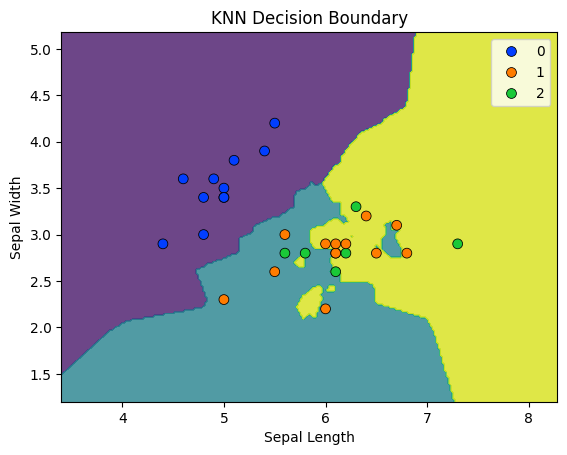

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (Iris dataset)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]  # Using sepal length and sepal width as features
y = iris.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the KNN model with k=5
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plotting the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='bright', edgecolor='k', s=50)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('KNN Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, model)